# Pandas II

In [58]:
import pandas as pd

## Indexación y slicing

- `df[col]` -> Seleccionar columna por índice/etiqueta
- `df.col` -> Selecconar columna como atributo
- `df.loc[row]` -> Seleccionar fila por índice
- `df.loc[:, col]` -> Seleccionar valores de una columna por índices
- `df.loc[row, col]` -> Seleccionar elementos concretos por índices
- `df.iloc[row_int, col_int]` -> Seleccionar elemento concreto por coordenadas

In [2]:
import numpy as np

In [3]:
df = pd.DataFrame(np.arange(16).reshape(4, 4),
                         index=['f1', 'f2', 'f3', 'f4'],
                         columns=['c1','c2','c3','c4'])
df

,c1,c2,c3,c4
f1,0,1,2,3
f2,4,5,6,7
f3,8,9,10,11
f4,12,13,14,15


In [4]:
df.c1

f1     0
f2     4
f3     8
f4    12
Name: c1, dtype: int32

In [5]:
df.f1

AttributeError: 'DataFrame' object has no attribute 'f1'

In [6]:
df['c1']

f1     0
f2     4
f3     8
f4    12
Name: c1, dtype: int32

In [7]:
df.loc['f1']

c1    0
c2    1
c3    2
c4    3
Name: f1, dtype: int32

In [8]:
df.loc['f1', 'c2']

1

In [9]:
df.iloc[0, 1]

1

- También podemos seleccionar varias columnas a la vez

In [10]:
df[['c1', 'c3']]

,c1,c3
f1,0,2
f2,4,6
f3,8,10
f4,12,14


In [11]:
df.loc[['f2', 'f4'], ['c2', 'c3']]

,c2,c3
f2,5,6
f4,13,14


In [12]:
df.iloc[[2, 3], [0, 1]]

,c1,c2
f3,8,9
f4,12,13


## Reindexing

- No se trata de cambiar el índice sino de reordenarlo, eliminar o añadir nuevas etiquetas.

In [13]:
df

,c1,c2,c3,c4
f1,0,1,2,3
f2,4,5,6,7
f3,8,9,10,11
f4,12,13,14,15


In [18]:
df.reindex(list(df.index) + ['f8'])

,c1,c2,c3,c4
f1,0.0,1.0,2.0,3.0
f2,4.0,5.0,6.0,7.0
f3,8.0,9.0,10.0,11.0
f4,12.0,13.0,14.0,15.0
f8,NaN,NaN,NaN,NaN


In [19]:
df.reindex(list(df.index) + ['f8'], fill_value=100)

,c1,c2,c3,c4
f1,0,1,2,3
f2,4,5,6,7
f3,8,9,10,11
f4,12,13,14,15
f8,100,100,100,100


- También podemos usarlo para eliminar columnas

In [20]:
df.reindex(columns=['c1', 'c2', 'c5'])

,c1,c2,c5
f1,0,1,NaN
f2,4,5,NaN
f3,8,9,NaN
f4,12,13,NaN


## Índices con duplicados

- Los índices pueden estar duplicados

In [21]:
serie = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
serie

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [22]:
serie.index.is_unique

False

In [23]:
serie['a']

a    0
a    1
dtype: int64

In [24]:
serie['c']

4

## Operaciones aritméticas con pandas

- Las operaciones se vectorizan alineandose según el índice
- Si hay índices que no coinciden se rellenan con NaN

In [25]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [26]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [27]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

- Existen funciones para poder especificar los valores de relleno cuando faltan índices

In [29]:
s1.add(s2, fill_value=0)

a    5.2
c    1.1
d    3.4
e    0.0
f    4.0
g    3.1
dtype: float64

- Lo mismo para dataframes

In [30]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), 
                   columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [31]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), 
                   columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [32]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [33]:
df1 = pd.DataFrame({'A': [1, 2]})
df1

,A
0,1
1,2


In [34]:
df2 = pd.DataFrame({'B': [3, 4]})
df2

,B
0,3
1,4


In [35]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


## Visualización básica

- Las estructuras Series y Dataframe traen métodos básicos para visualizar los datos
- Estos métodos utilizan por debajo la librería `matplotlib`, librería estándar para visualización de datos en Python

In [36]:
data = {
    'population': np.random.randint(100, 300, 10),
    'PIB': np.random.randint(10000, 30000, 10),
}
df = pd.DataFrame(data)
df

,population,PIB
0,183,16809
1,226,27849
2,262,18572
3,135,14895
4,122,22263
5,260,19718
6,243,23009
7,109,19626
8,222,21497
9,257,17053


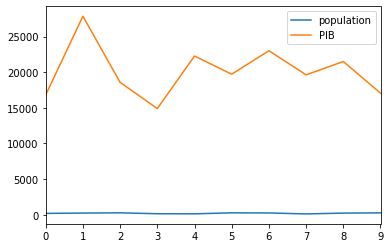

In [38]:
df.plot()

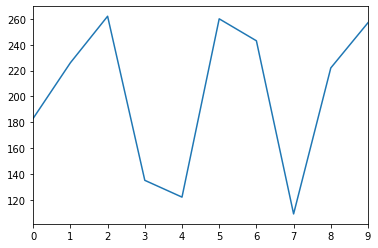

In [39]:
df.population.plot()

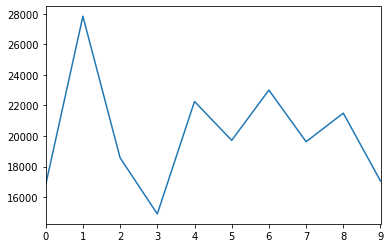

In [40]:
df.PIB.plot()

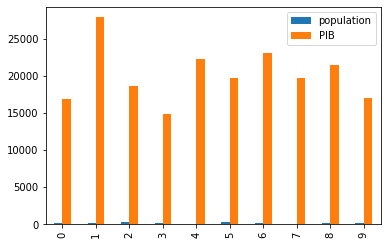

In [41]:
df.plot.bar()

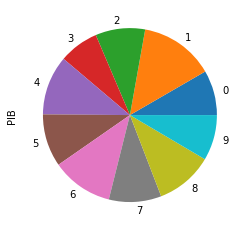

In [42]:
df.PIB.plot.pie()

In [59]:
df = pd.DataFrame(np.random.normal(loc=10, size=1000), columns=['Normal'])

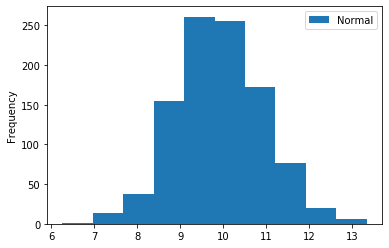

In [60]:
df.plot.hist()

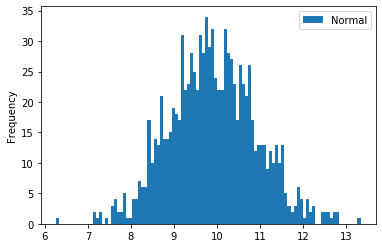

In [61]:
df.plot.hist(bins=100)

In [62]:
df['chi2'] = np.random.chisquare(10, size=1000)

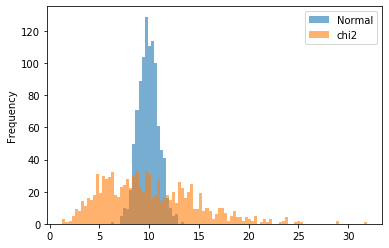

In [63]:
df.plot.hist(bins=100, alpha=0.6)

- Estos métodos pasan directamente los kwargs a las funciones de matplotlib
- Por lo que podemos buscar información sobre las opciones de estos métodos directamente en matplotlib.

- Aunque estos métodos proporcionan una forma rápida y cómoda de visualizar los datos, normalmente presentan una funcionalidad limitada respecto a la librería estándar `matplotlib`

## Funciones

- `count` -> Cuenta valores que no sean Nan
- `describe` -> Resumen estadístico de los datos
- `min`/`max` -> Valor mínimo/máximo
- `argmin`/`argmax` -> Devuelve la posición del valor mínimo/máximo (sólo para Series)
- `idxmin`/`idxmax` -> Devuelve las etiquetas del valor mínimo/máximo
- `quantile` -> Calcula los cuantiles
- `sum` -> Suma los valores
- `mean` -> Media
- `median` -> Mediana
- `mad` -> Media de la desviación absoluta respecto de la media
- `prod` -> Producto de todos los valorees
- `var` -> Varianza
- `std` -> Desviación estándar
- `skew` -> Asimetría (3º momento de la distribución)
- `kurt` -> Curtosis (4º momento de la distribución)
- `cumsum` -> Suma acumulativa
- `cumprod` -> Producto acumulativo
- `diff` -> Diferencia aritmética entre valores consecutivos
- `pct_change` -> Calcula la variación en porcentaje entre valores consecutivos


In [65]:
df = pd.read_csv('data/googl.us.csv')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0


In [67]:
df.Date.head()

0    2004-08-19
1    2004-08-20
2    2004-08-23
3    2004-08-24
4    2004-08-25
Name: Date, dtype: object

In [95]:
df = pd.read_csv('data/googl.us.csv', index_col='Date', parse_dates=['Date'])
df.drop('OpenInt', axis=1, inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,50.000,52.03,47.980,50.170,44703800
2004-08-20,50.505,54.54,50.250,54.155,22857200
2004-08-23,55.375,56.74,54.525,54.700,18274400
2004-08-24,55.620,55.80,51.785,52.435,15262600
2004-08-25,52.480,54.00,51.940,53.000,9197800
...,...,...,...,...,...
2017-11-06,1049.100,1052.59,1042.000,1042.680,913954
2017-11-07,1049.650,1053.41,1043.000,1052.390,1303832
2017-11-08,1050.050,1062.69,1047.050,1058.290,1214469


In [96]:
df.index[:5]

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [97]:
df.count()

Open      3333
High      3333
Low       3333
Close     3333
Volume    3333
dtype: int64

In [98]:
df.describe()

,Open,High,Low,Close,Volume
count,3333.000000,3333.000000,3333.000000,3333.000000,3.333000e+03
mean,389.993375,393.377354,386.213266,389.855821,7.951734e+06
std,235.104757,236.348229,233.616339,235.102374,8.327410e+06
min,49.595000,50.870000,47.980000,50.005000,0.000000e+00
25%,228.730000,230.930000,226.170000,228.510000,2.535424e+06
50%,295.980000,298.190000,293.350000,295.610000,5.201600e+06
75%,550.370000,554.780000,545.500000,549.490000,1.047400e+07
max,1050.050000,1063.620000,1047.050000,1058.290000,8.223340e+07


In [99]:
df.max()

Open          1050.05
High          1063.62
Low           1047.05
Close         1058.29
Volume    82233400.00
dtype: float64

In [100]:
df.idxmax()

Open     2017-11-08
High     2017-10-27
Low      2017-11-08
Close    2017-11-08
Volume   2006-01-20
dtype: datetime64[ns]

In [101]:
df.quantile(q=0.23)

Open      2.201800e+02
High      2.237680e+02
Low       2.171888e+02
Close     2.199200e+02
Volume    2.356028e+06
Name: 0.23, dtype: float64

In [102]:
df.median()

Open          295.98
High          298.19
Low           293.35
Close         295.61
Volume    5201600.00
dtype: float64

In [103]:
df.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02',
               '2017-11-03', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10'],
              dtype='datetime64[ns]', name='Date', length=3333, freq=None)

In [104]:
from datetime import datetime

In [105]:
df.loc[datetime(2020,1,1)] = df.median()

In [106]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-07,1049.65,1053.41,1043.00,1052.39,1303832.0
2017-11-08,1050.05,1062.69,1047.05,1058.29,1214469.0
2017-11-09,1048.00,1050.88,1035.85,1047.72,1793994.0
2017-11-10,1043.87,1046.63,1041.22,1044.15,970498.0
2020-01-01,295.98,298.19,293.35,295.61,5201600.0


In [108]:
df['media'] = df[['Open', 'High', 'Low', 'Close']].mean(axis=1)

In [109]:
df

,Open,High,Low,Close,Volume,media
Date,,,,,,
2004-08-19,50.000,52.03,47.980,50.170,44703800.0,50.0450
2004-08-20,50.505,54.54,50.250,54.155,22857200.0,52.3625
2004-08-23,55.375,56.74,54.525,54.700,18274400.0,55.3350
2004-08-24,55.620,55.80,51.785,52.435,15262600.0,53.9100
2004-08-25,52.480,54.00,51.940,53.000,9197800.0,52.8550
...,...,...,...,...,...,...
2017-11-07,1049.650,1053.41,1043.000,1052.390,1303832.0,1049.6125
2017-11-08,1050.050,1062.69,1047.050,1058.290,1214469.0,1054.5200
2017-11-09,1048.000,1050.88,1035.850,1047.720,1793994.0,1045.6125


In [110]:
df.median()

Open      2.959800e+02
High      2.981900e+02
Low       2.933500e+02
Close     2.956100e+02
Volume    5.201600e+06
media     2.955587e+02
dtype: float64

In [111]:
df.std()

Open      2.350751e+02
High      2.363185e+02
Low       2.335868e+02
Close     2.350728e+02
Volume    8.326297e+06
media     2.350008e+02
dtype: float64

In [115]:
df['Volume'].cumsum()

Date
2004-08-19    4.470380e+07
2004-08-20    6.756100e+07
2004-08-23    8.583540e+07
2004-08-24    1.010980e+08
2004-08-25    1.102958e+08
                  ...     
2017-11-07    2.649915e+10
2017-11-08    2.650036e+10
2017-11-09    2.650216e+10
2017-11-10    2.650313e+10
2020-01-01    2.650833e+10
Name: Volume, Length: 3334, dtype: float64

In [120]:
list(df.index).pop()

Timestamp('2020-01-01 00:00:00')

In [123]:
a = list(df.index)
a.pop(-1)

Timestamp('2020-01-01 00:00:00')

In [130]:
df = df.reindex(a)

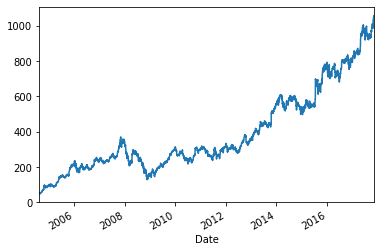

In [131]:
df['Close'].plot()

In [132]:
df.diff()

,Open,High,Low,Close,Volume,media
Date,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,0.505,2.51,2.270,3.985,-21846600.0,2.3175
2004-08-23,4.870,2.20,4.275,0.545,-4582800.0,2.9725
2004-08-24,0.245,-0.94,-2.740,-2.265,-3011800.0,-1.4250
2004-08-25,-3.140,-1.80,0.155,0.565,-6064800.0,-1.0550
...,...,...,...,...,...,...
2017-11-06,6.350,1.93,4.350,-7.310,-474507.0,1.3300
2017-11-07,0.550,0.82,1.000,9.710,389878.0,3.0200
2017-11-08,0.400,9.28,4.050,5.900,-89363.0,4.9075


In [133]:
df_pct = df.pct_change()

In [134]:
df_pct

,Open,High,Low,Close,Volume,media
Date,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,0.010100,0.048241,0.047311,0.079430,-0.488697,0.046308
2004-08-23,0.096426,0.040337,0.085075,0.010064,-0.200497,0.056768
2004-08-24,0.004424,-0.016567,-0.050252,-0.041408,-0.164810,-0.025752
2004-08-25,-0.056455,-0.032258,0.002993,0.010775,-0.397363,-0.019570
...,...,...,...,...,...,...
2017-11-06,0.006090,0.001837,0.004192,-0.006962,-0.341750,0.001272
2017-11-07,0.000524,0.000779,0.000960,0.009313,0.426584,0.002886
2017-11-08,0.000381,0.008809,0.003883,0.005606,-0.068539,0.004676


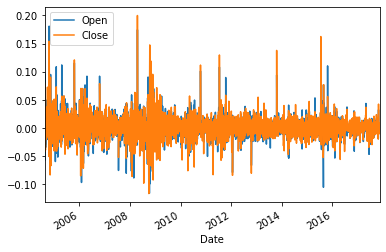

In [135]:
df_pct[['Open', 'Close']].plot()

- La mayoría de estas funciones poseen un parámetro `axis` que nos indica si queremos agregar:
    - `axis=0` -> por filas  o
    - `axis=1` -> por columnas

In [136]:
df.drop('Volume', axis=1, inplace=True)

In [137]:
df.mean(axis=1)

Date
2004-08-19      50.0450
2004-08-20      52.3625
2004-08-23      55.3350
2004-08-24      53.9100
2004-08-25      52.8550
                ...    
2017-11-06    1046.5925
2017-11-07    1049.6125
2017-11-08    1054.5200
2017-11-09    1045.6125
2017-11-10    1043.9675
Length: 3333, dtype: float64

- No olvidemos que siempre podemos consultar la ayuda de cada una de estas funciones.
- Esto es especialmente útil para saber los parámetros que les podemos pasar.

- Hay infinidad de métodos, que se van aprendiendo con el uso

In [138]:
from utils import midir
midir(pd.DataFrame())

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_accessors',
 '_add_numeric_operations',
 '_add_series_only_operations',
 '_add_series_or_dataframe_operations',
 '_agg_by_level',
 '_agg_examples_doc',
 '_agg_summary_and_see_also_doc',
 '_aggregate',
 '_aggregate_multiple_funcs',
 '_align_frame',
 '_align_series',
 '_box_col_values',
 '_box_item_values',
 '_builtin_table',
 '_check_inplace_setting',
 '_check_is_chained_assignment_possible',
 '_check_label_or_level_ambiguity',
 '_check_percentile',
 '_check_setitem_copy',
 '_clear_item_cache',
 '_clip_with_one_bound',
 '_clip_with_scalar',
 '_combine_const',
 '_combine_frame',
 '_combine_match_columns',
 '_combine_match_index',
 '_consolidate',
 '_consolidate_inplace',
 '_construct_axes_dict',
 '_construct_axes_dict_from',
 '_construct_axes_from_arguments',
 '_constructor',
 '_constructor_expanddim',
 '_constructor_sliced',
 '_convert',
 '_count_level',
 '_c

## Mappings

- Podemos aplicar una función arbitraria a un pandas dataframe con los métodos:
    - `applymap()` -> Aplica elemento a elementos
    - `apply()` -> Aplica sobre filas o columnas
- En el caso de `apply()`, por defecto, el mapping se aplica a las filas, pero podemos cambiarlo con el parámetro `axis`

In [139]:
df.head()

,Open,High,Low,Close,media
Date,,,,,
2004-08-19,50.000,52.03,47.980,50.170,50.0450
2004-08-20,50.505,54.54,50.250,54.155,52.3625
2004-08-23,55.375,56.74,54.525,54.700,55.3350
2004-08-24,55.620,55.80,51.785,52.435,53.9100
2004-08-25,52.480,54.00,51.940,53.000,52.8550


In [140]:
df.applymap(np.floor)

,Open,High,Low,Close,media
Date,,,,,
2004-08-19,50.0,52.0,47.0,50.0,50.0
2004-08-20,50.0,54.0,50.0,54.0,52.0
2004-08-23,55.0,56.0,54.0,54.0,55.0
2004-08-24,55.0,55.0,51.0,52.0,53.0
2004-08-25,52.0,54.0,51.0,53.0,52.0
...,...,...,...,...,...
2017-11-06,1049.0,1052.0,1042.0,1042.0,1046.0
2017-11-07,1049.0,1053.0,1043.0,1052.0,1049.0
2017-11-08,1050.0,1062.0,1047.0,1058.0,1054.0


In [141]:
df.applymap(lambda x: np.round(x) - np.floor(x))

,Open,High,Low,Close,media
Date,,,,,
2004-08-19,0.0,0.0,1.0,0.0,0.0
2004-08-20,1.0,1.0,0.0,0.0,0.0
2004-08-23,0.0,1.0,1.0,1.0,0.0
2004-08-24,1.0,1.0,1.0,0.0,1.0
2004-08-25,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
2017-11-06,0.0,1.0,0.0,1.0,1.0
2017-11-07,1.0,0.0,0.0,0.0,1.0
2017-11-08,0.0,1.0,0.0,0.0,1.0


In [144]:
def fun(serie):
    return serie.max() - serie.min()

In [145]:
df.apply(fun)

Open     1000.455
High     1012.750
Low       999.070
Close    1008.285
media    1004.475
dtype: float64

In [146]:
df.apply(fun, axis=1)

Date
2004-08-19     4.050
2004-08-20     4.290
2004-08-23     2.215
2004-08-24     4.015
2004-08-25     2.060
               ...  
2017-11-06    10.590
2017-11-07    10.410
2017-11-08    15.640
2017-11-09    15.030
2017-11-10     5.410
Length: 3333, dtype: float64

In [148]:
df

,Open,High,Low,Close,media
Date,,,,,
2004-08-19,50.000,52.03,47.980,50.170,50.0450
2004-08-20,50.505,54.54,50.250,54.155,52.3625
2004-08-23,55.375,56.74,54.525,54.700,55.3350
2004-08-24,55.620,55.80,51.785,52.435,53.9100
2004-08-25,52.480,54.00,51.940,53.000,52.8550
...,...,...,...,...,...
2017-11-06,1049.100,1052.59,1042.000,1042.680,1046.5925
2017-11-07,1049.650,1053.41,1043.000,1052.390,1049.6125
2017-11-08,1050.050,1062.69,1047.050,1058.290,1054.5200


In [147]:
df.apply(lambda x: x/x.Close, axis=1)

,Open,High,Low,Close,media
Date,,,,,
2004-08-19,0.996612,1.037074,0.956348,1.0,0.997508
2004-08-20,0.932601,1.007109,0.927892,1.0,0.966901
2004-08-23,1.012340,1.037294,0.996801,1.0,1.011609
2004-08-24,1.060742,1.064175,0.987604,1.0,1.028130
2004-08-25,0.990189,1.018868,0.980000,1.0,0.997264
...,...,...,...,...,...
2017-11-06,1.006157,1.009504,0.999348,1.0,1.003752
2017-11-07,0.997396,1.000969,0.991077,1.0,0.997361
2017-11-08,0.992214,1.004158,0.989379,1.0,0.996438


- Si estamos trabajando con una serie, debemos usar el método `map()`

In [150]:
df['Open'].applymap()

AttributeError: 'Series' object has no attribute 'applymap'

In [151]:
df['Open'].map(np.floor)

Date
2004-08-19      50.0
2004-08-20      50.0
2004-08-23      55.0
2004-08-24      55.0
2004-08-25      52.0
               ...  
2017-11-06    1049.0
2017-11-07    1049.0
2017-11-08    1050.0
2017-11-09    1048.0
2017-11-10    1043.0
Name: Open, Length: 3333, dtype: float64

## Sorting

- Podemos ordenar según el índice

In [153]:
df.sort_index(ascending=False)

,Open,High,Low,Close,media
Date,,,,,
2017-11-10,1043.870,1046.63,1041.220,1044.150,1043.9675
2017-11-09,1048.000,1050.88,1035.850,1047.720,1045.6125
2017-11-08,1050.050,1062.69,1047.050,1058.290,1054.5200
2017-11-07,1049.650,1053.41,1043.000,1052.390,1049.6125
2017-11-06,1049.100,1052.59,1042.000,1042.680,1046.5925
...,...,...,...,...,...
2004-08-25,52.480,54.00,51.940,53.000,52.8550
2004-08-24,55.620,55.80,51.785,52.435,53.9100
2004-08-23,55.375,56.74,54.525,54.700,55.3350


- También podemos ordenar según los valores

In [155]:
df_s = df.sort_values(by='Close')

In [156]:
df_s['Close'].cumsum()

Date
2004-09-03         50.005
2004-09-01        100.130
2004-08-19        150.300
2004-09-02        201.055
2004-09-07        251.845
                 ...     
2017-11-10    1295181.063
2017-11-09    1296228.783
2017-11-03    1297278.773
2017-11-07    1298331.163
2017-11-08    1299389.453
Name: Close, Length: 3333, dtype: float64

In [170]:
df['Close'].resample('1M').last().pct_change()*100

Date
2004-08-31          NaN
2004-09-30    26.599590
2004-10-31    47.098765
2004-11-30    -4.542593
2004-12-31     5.940213
                ...    
2017-07-31     1.709319
2017-08-31     1.030143
2017-09-30     1.896905
2017-10-31     6.131339
2017-11-30     1.075467
Freq: M, Name: Close, Length: 160, dtype: float64